# Red recurrente para predicción de los valores de una acción

## Introducción

En este ejercicio vamos a predecir los valores que va a tomar una acción durante un número determinado de días al final de un período. Para ello debemos **cargar en Google Colab** el fichero CSV que se nos proporcionará con los datos de la acción en cuestión.

## Inicialización

Inicializamos las librerías y variables de configuración necesarias antes de empezar

In [ ]:
# Importar módulos necesarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, LSTM, Bidirectional
from sklearn.preprocessing import MinMaxScaler

# Variables de configuración del problema
EPOCHS = 50               # Número de iteraciones de la red
NEURONAS_CAPA = 50        # Número de neuronas en cada capa oculta
T = 60                    # Tamaño del "timestep"

Ahora vamos a cargar el fichero CSV y seleccionar los datos de entrada

In [ ]:
# Carga inicial de datos, fijando como índice la columna "Date"
datos = pd.read_csv('valores_accion.csv', index_col='Date', parse_dates=['Date'])
datos.head()

Open   High    Low  Close    Volume  Name
Date                                                  
2006-01-03  39.69  41.22  38.79  40.91  24232729  AABA
2006-01-04  41.22  41.90  40.77  40.97  20553479  AABA
2006-01-05  40.93  41.73  40.85  41.53  12829610  AABA
2006-01-06  42.88  43.57  42.80  43.21  29422828  AABA
2006-01-09  43.10  43.66  42.82  43.42  16268338  AABA

In [ ]:
# El conjunto de entrenamiento serán todos los valores de la acción hasta 2016 (inclusive)
# Nos quedaremos con la columna 1 (valor máximo de la acción o "High")
datos_train = datos[:'2016'].iloc[:,1:2]
# El conjunto de test a predecir serán los valores en 2017
datos_test = datos['2017':].iloc[:,1:2]
print(datos_train.head())
print(datos_test.head())

             High
Date             
2006-01-03  41.22
2006-01-04  41.90
2006-01-05  41.73
2006-01-06  43.57
2006-01-09  43.66
             High
Date             
2017-01-03  39.18
2017-01-04  40.25
2017-01-05  41.37
2017-01-06  41.34
2017-01-09  41.66


Mostramos un gráfico combinado de los valores de entrenamiento y test, para ver lo que vamos a predecir

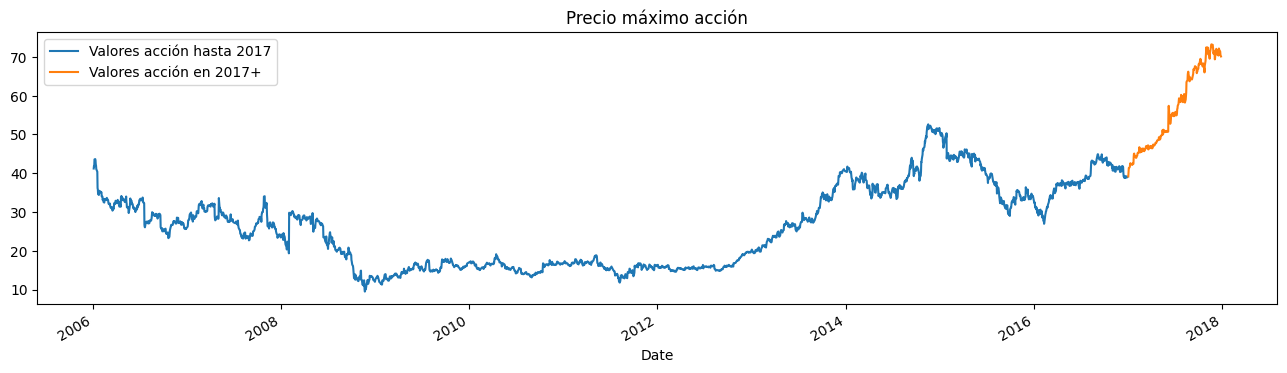

In [ ]:
datos["High"][:'2016'].plot(figsize=(16,4),legend=True)
datos["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Valores acción hasta 2017','Valores acción en 2017+'])
plt.title('Precio máximo acción')
plt.show()

Pasamos a escalar los datos de entrenamiento y test en el rango 0-1

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
datos_train = sc.fit_transform(datos_train)
datos_test = sc.transform(datos_test)

Ahora construimos las secuencias de entrada con el *timestep* T indicado

In [ ]:
X_train = []
y_train = []
for i in range(T, len(datos_train)):
    X_train.append(datos_train[i-T:i, 0])
    y_train.append(datos_train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(2708, 60)
(2708,)


## Ejercicio 1. Construcción del modelo (RNR)

Vamos a construir ahora una red neuronal recurrente con las siguientes características:

- 4 capas LSTM con tantas neuronas como hayamos indicado en la variable NEURONAS_CAPA
- Función de coste MSE
- Optimizador RMSProp

In [ ]:
modelo1 = Sequential()
# TAREA: construye una red neuronal recurrente con:
# - 4 capas LSTM de 50 neuronas cada una
# - Optimizador 'rmsprop'
# - Función de coste 'mse'
# Entrena durante 50 epochs con los datos anteriores


Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 18s 132ms/step - loss: 0.0308
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 19s 116ms/step - loss: 0.0069
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - loss: 0.0052
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - loss: 0.0052
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - loss: 0.0045
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - loss: 0.0039
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - loss: 0.0040
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 142ms/step - loss: 0.0037
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 19s 126ms/step - loss: 0.0026
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 19s 112ms/step - loss: 0.0028
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - loss: 0.0029
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step - loss: 0.0027
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 115ms/step - loss: 0.0028
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - loss: 0.0023
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 

## Predicción y evaluación de resultados

Vamos ahora a predecir los valores del conjunto de test, y a compararlos con los reales.

En primer lugar, construimos una secuencia que aúne los datos de entrenamiento y a continuación los de test, ya que para poder predecir el primer valor de test necesitaremos los T valores previos de entrenamiento, y así sucesivamente

In [ ]:
datos_enlazados = np.concatenate((datos_train, datos_test),axis=0)
entradas = datos_enlazados[len(datos_enlazados)-len(datos_test) - T:]

Ahora vamos a construir el conjunto de test con bloques de T valores

In [ ]:
X_test = []
for i in range(T,len(entradas)):
    X_test.append(entradas[i-T:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_test.shape

(251, 60, 1)

Predecimos los resultados para cada secuencia del test, y comparamos los resultados obtenidos con los datos reales del conjunto de test

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step


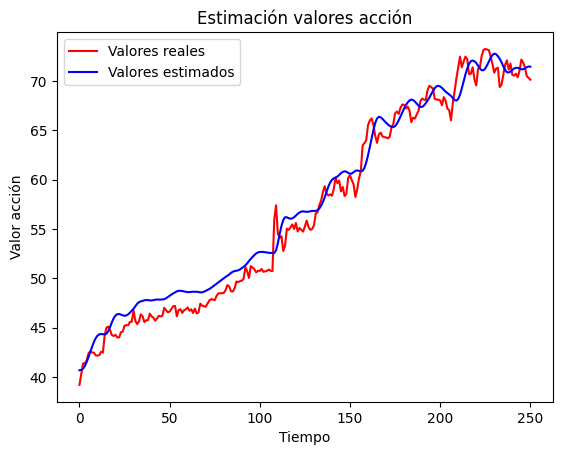

In [ ]:
# TAREA: recoger las predicciones sobre X_test
# y mostrar un gráfico comparativo con los valores
# reales de "datos_test"
# Recuerda des-normalizar los datos de ambas secuencias
# Función auxiliar para predecir resultados
